In [809]:

import pandas as pd
import numpy as np

from scipy import stats

import os 

os.chdir("/home/ptruong/git/dia_sum/scripts/PXD002952")

from q_value import qvalues
from triqler_output_to_df import  parse_triqler
#os.chdir("/hdd_14T/data/PXD002952/osw_res_20210303/hye124/ttof6600/32fix/full_ts_v")

os.chdir("/hdd_14T/data/PXD002952/20210614_dataset/diaumpire_spectral_lib_20210706/MSFragger_20210707/diann_20210811")


In [810]:
import seaborn as sns

sns.set_context("poster")

In [811]:

# filename has different formatting, we need to change number or implement regex.
experiment_id_mapper = lambda x: x.split("_")[5]
sample_id_mapper = lambda x: x.split("_")[8] #hye124 
specie_mapper = lambda x: x.split("_")[-1]

def read_in_and_filter(filename, m_score_treshold = 0.01):  
    print(filename)
    df = pd.read_csv(filename, sep = "\t")
    df = df[df.decoy != 1]
    df = df[df.m_score < m_score_treshold] # filter away crap, so all values should be good... we take average of top3 here
    print(str(len(df)) + " significantly identified peptides at " + str(m_score_treshold) + " FDR-treshold.")
    print("")
    df["experiment_id"] = df["filename"].map(experiment_id_mapper)
    df["sample_id"] = df["filename"].map(sample_id_mapper)
    sample_id = df.sample_id.unique()[0]
    experiment_id = df.experiment_id.unique()[0]     

    #midx = pd.MultiIndex(levels = [[sample_id],[experiment_id]], codes = [[0],[0]], names = ["sample_id", "experiment_id"])
    df["specie"] = df["ProteinName"].map(specie_mapper)
    df = df.set_index(["specie", "ProteinName", "FullPeptideName", "sample_id", "experiment_id"])
    df = df[["Intensity"]]
    df = pd.DataFrame(df.values, index = df.index)
    
    return df


In [812]:
os.listdir()

['report.tsv',
 'msstats_run.csv',
 'report.log.txt',
 'sessionInfo.txt',
 'triqler_results',
 'msrobsum_results_msqrobsum.rds',
 'msqrobsum_protein_sum_20210817.csv',
 'report.stats.tsv',
 'msqrobsum_result.csv',
 'report.pg_matrix.tsv',
 'run_triqler.sh',
 'pd.csv',
 'report.pdf',
 'diann_msstats_input.csv',
 'fd.csv',
 'report.gg_matrix.tsv',
 'msstat_output_runleveldata.csv',
 'msstats-2.log',
 'report.unique_genes_matrix.tsv',
 'triqler_input_diann_searchScore_Qvalue.csv',
 'triqler_input_diann_searchScore_Qvalue.csv.pqr.tsv',
 'expr.csv',
 'msstats-1.log',
 'msstat_output_filtered.csv',
 'msstats.log',
 'report.pr_matrix.tsv']

In [813]:
df = pd.read_csv("triqler_input_diann_searchScore_Qvalue.csv", sep = "\t")                      


In [814]:
df

,run,condition,charge,searchScore,intensity,peptide,proteins
0,002-Pedro,1,2,9.825093,791.822144,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
1,003-Pedro,2,2,9.464517,773.533447,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
2,004-Pedro,1,2,9.198167,910.519959,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
3,005-Pedro,2,2,9.486911,860.940491,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
4,006-Pedro,1,2,9.324160,909.658081,AAAAAAAAAAGAAGGR,Q86U42_HUMAN
...,...,...,...,...,...,...,...
217888,005-Pedro,2,2,9.391661,289.798309,YYYIPQYK,Q8N183_HUMAN
217889,006-Pedro,1,2,9.324160,362.397034,YYYIPQYK,Q8N183_HUMAN
217890,007-Pedro,2,2,9.220538,338.117950,YYYIPQYK,Q8N183_HUMAN
217891,004-Pedro,1,4,2.363257,50.300472,YYYKFIKCDADLLESR,DECOY_Q70Z53_HUMAN


In [815]:
x = 0.05
e = -np.log(x)
1/np.e**e

0.05000000000000002

In [816]:
df["q_value"] = 1/np.e**df["searchScore"]

In [817]:
df.q_value.max()

0.8778716326000001

In [818]:
#treshold = 1.00
treshold = 0.01
df = df[df["q_value"] < treshold]

In [819]:
#df["intensity"] = np.log2(df["intensity"])

In [820]:
df_means = df.groupby("peptide").mean()

In [821]:
df_stat = pd.DataFrame(df_means.intensity, index = df_means.index, columns = ["mu"])


In [822]:
pd.DataFrame(df_means.intensity)

,intensity
peptide,
AAAAAAAAAAGAAGGR,860.782375
AAAAAAAAAPAAAATAPTTAATTAATAAQ,391.567084
AAAAAAAGDSDSWDADAFSVEDPVRK,208.388036
AAAAAAGAASGLPGPVAQGLK,637.149841
AAAAAATAAAAASIR,125.267830
...,...
YYTEFPTVLDITAEDPSK,173.738780
YYTGNYDQYVK,101.306913
YYTGVVNNNEMVALQR,42.883250


In [823]:
df_stat

,mu
peptide,
AAAAAAAAAAGAAGGR,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN
AAAAAAGAASGLPGPVAQGLK,NaN
AAAAAATAAAAASIR,NaN
...,...
YYTEFPTVLDITAEDPSK,NaN
YYTGNYDQYVK,NaN
YYTGVVNNNEMVALQR,NaN


In [824]:
df

,run,condition,charge,searchScore,intensity,peptide,proteins,q_value
0,002-Pedro,1,2,9.825093,791.822144,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000054
1,003-Pedro,2,2,9.464517,773.533447,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000078
2,004-Pedro,1,2,9.198167,910.519959,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000101
3,005-Pedro,2,2,9.486911,860.940491,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000076
4,006-Pedro,1,2,9.324160,909.658081,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,0.000089
...,...,...,...,...,...,...,...,...
217886,003-Pedro,2,2,9.256460,320.890686,YYYIPQYK,Q8N183_HUMAN,0.000095
217887,004-Pedro,1,2,9.198167,300.869049,YYYIPQYK,Q8N183_HUMAN,0.000101
217888,005-Pedro,2,2,9.391661,289.798309,YYYIPQYK,Q8N183_HUMAN,0.000083
217889,006-Pedro,1,2,9.324160,362.397034,YYYIPQYK,Q8N183_HUMAN,0.000089


In [825]:

import matplotlib.pyplot as plt
import seaborn as sns 

def get_peptide_mu_sigma(df):
    df_means = df.groupby("peptide").mean()

    df_stat = pd.DataFrame(df_means.intensity.values, index = df_means.index, columns = ["mu"])
    df_stat["std"] = df.groupby("peptide").std().intensity
    df_stat["std/mu-ratio"] = df_stat["std"] / df_stat["mu"]
    return df_stat

def select_specie_and_sample(df, specie = "HUMAN", sample = "1"):
    return df.iloc[(df.index.get_level_values("specie") == specie) & (df.index.get_level_values("sample_id") == sample), :]

def select_sample(df, sample = "1"):
    return df.iloc[(df.index.get_level_values("sample_id") == sample), :]

In [826]:
df_stat

,mu
peptide,
AAAAAAAAAAGAAGGR,NaN
AAAAAAAAAPAAAATAPTTAATTAATAAQ,NaN
AAAAAAAGDSDSWDADAFSVEDPVRK,NaN
AAAAAAGAASGLPGPVAQGLK,NaN
AAAAAATAAAAASIR,NaN
...,...
YYTEFPTVLDITAEDPSK,NaN
YYTGNYDQYVK,NaN
YYTGVVNNNEMVALQR,NaN


In [827]:
#mu_sig_sample1 = get_peptide_mu_sigma(select_sample(df, sample = "1"))
#mu_sig_sample2 = get_peptide_mu_sigma(select_sample(df, sample = "2"))

#bins = [i*2 for i in range(11)]
#mu_sig_sample1["binned_mu"] = pd.cut(mu_sig_sample1["mu"], bins)
#mu_sig_sample1["quantile_bin_mu"] = pd.qcut(mu_sig_sample1["mu"], q=8)

#mu_sig_sample2["binned_mu"] = pd.cut(mu_sig_sample2["mu"], bins)
#mu_sig_sample2["quantile_bin_mu"] = pd.qcut(mu_sig_sample2["mu"], q=8)

In [828]:
#f, ax = plt.subplots(2, 2, figsize = (17,17))
#sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample1, ax=ax[0,0])
#ax[0,0].set_title("sample1 - std/mu ratio vs binned_mu for log-transformed peptide values")

#sns.violinplot(x='binned_mu', y='std', data=mu_sig_sample2, ax=ax[0,1])
#ax[0,1].set_title("sample2 - std/mu ratio vs binned_mu for log-transformed peptide values")

#sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample1, ax=ax[1,0])
#ax[1,0].set_title("sample1 - std/mu vs quantile_bin_mu for log-transformed peptide values")

#sns.violinplot(x='quantile_bin_mu', y='std', data=mu_sig_sample2, ax=ax[1,1])
#ax[1,1].set_title("sample2 - std/mu vs quantile_bin_mu for log-transformed peptide values")


In [829]:
#df["intensity"] = df[0]
#df = df.drop([0], axis = 1)
df_stats = get_peptide_mu_sigma(df).dropna()

In [830]:
df_stats["mu"] 

bins = [i*2 for i in range(11)]
df_stats["binned_mu"] = pd.cut(df_stats["mu"], bins,  include_lowest=True)
df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=8)




In [831]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,860.782375,59.389805,0.068995,NaN,"(600.35, 27686.29]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,391.567084,261.582629,0.668040,NaN,"(339.608, 600.35]"
AAAAAAAGDSDSWDADAFSVEDPVRK,208.388036,13.395283,0.064280,NaN,"(159.312, 226.956]"
AAAAAAGAASGLPGPVAQGLK,637.149841,39.797124,0.062461,NaN,"(600.35, 27686.29]"
AAAAAATAAAAASIR,125.267830,18.647039,0.148857,NaN,"(112.815, 159.312]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,173.738780,42.529855,0.244792,NaN,"(159.312, 226.956]"
YYTGNYDQYVK,101.306913,8.845688,0.087316,NaN,"(75.582, 112.815]"
YYTGVVNNNEMVALQR,42.883250,12.171083,0.283819,NaN,"(42.586, 75.582]"


In [832]:
df_stats


,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,860.782375,59.389805,0.068995,NaN,"(600.35, 27686.29]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,391.567084,261.582629,0.668040,NaN,"(339.608, 600.35]"
AAAAAAAGDSDSWDADAFSVEDPVRK,208.388036,13.395283,0.064280,NaN,"(159.312, 226.956]"
AAAAAAGAASGLPGPVAQGLK,637.149841,39.797124,0.062461,NaN,"(600.35, 27686.29]"
AAAAAATAAAAASIR,125.267830,18.647039,0.148857,NaN,"(112.815, 159.312]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,173.738780,42.529855,0.244792,NaN,"(159.312, 226.956]"
YYTGNYDQYVK,101.306913,8.845688,0.087316,NaN,"(75.582, 112.815]"
YYTGVVNNNEMVALQR,42.883250,12.171083,0.283819,NaN,"(42.586, 75.582]"


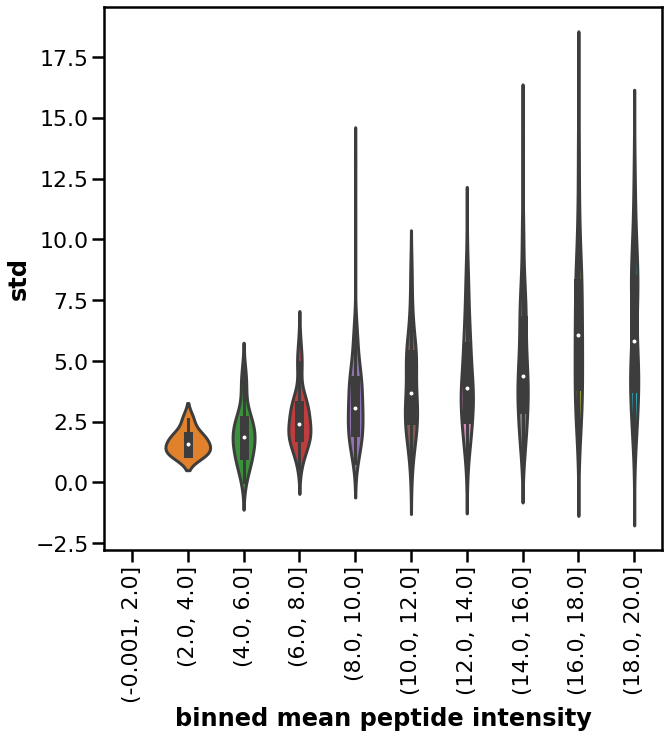

In [833]:
f, ax = plt.subplots(1, 1, figsize = (10,10))
sns.violinplot(x='binned_mu', y='std', data=df_stats, ax=ax)
#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel("std", fontweight = "bold")
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontweight="bold")
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major',labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

In [834]:
df_stats

,mu,std,std/mu-ratio,binned_mu,quantile_bin_mu
peptide,,,,,
AAAAAAAAAAGAAGGR,860.782375,59.389805,0.068995,NaN,"(600.35, 27686.29]"
AAAAAAAAAPAAAATAPTTAATTAATAAQ,391.567084,261.582629,0.668040,NaN,"(339.608, 600.35]"
AAAAAAAGDSDSWDADAFSVEDPVRK,208.388036,13.395283,0.064280,NaN,"(159.312, 226.956]"
AAAAAAGAASGLPGPVAQGLK,637.149841,39.797124,0.062461,NaN,"(600.35, 27686.29]"
AAAAAATAAAAASIR,125.267830,18.647039,0.148857,NaN,"(112.815, 159.312]"
...,...,...,...,...,...
YYTEFPTVLDITAEDPSK,173.738780,42.529855,0.244792,NaN,"(159.312, 226.956]"
YYTGNYDQYVK,101.306913,8.845688,0.087316,NaN,"(75.582, 112.815]"
YYTGVVNNNEMVALQR,42.883250,12.171083,0.283819,NaN,"(42.586, 75.582]"


# Adjust to remove peptides with missing values in samples

In [835]:
peptides_included_in_all_samples = (df.groupby("peptide").count() >= 6).index

In [836]:
df_filtered = df[df["peptide"].isin(peptides_included_in_all_samples)]

In [837]:
df_stats_filtered = get_peptide_mu_sigma(df_filtered)

In [838]:
bins = [i*2 for i in range(11)]
df_stats_filtered["binned_mu"] = pd.cut(df_stats_filtered["mu"], bins,  include_lowest=True)
#df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=8)


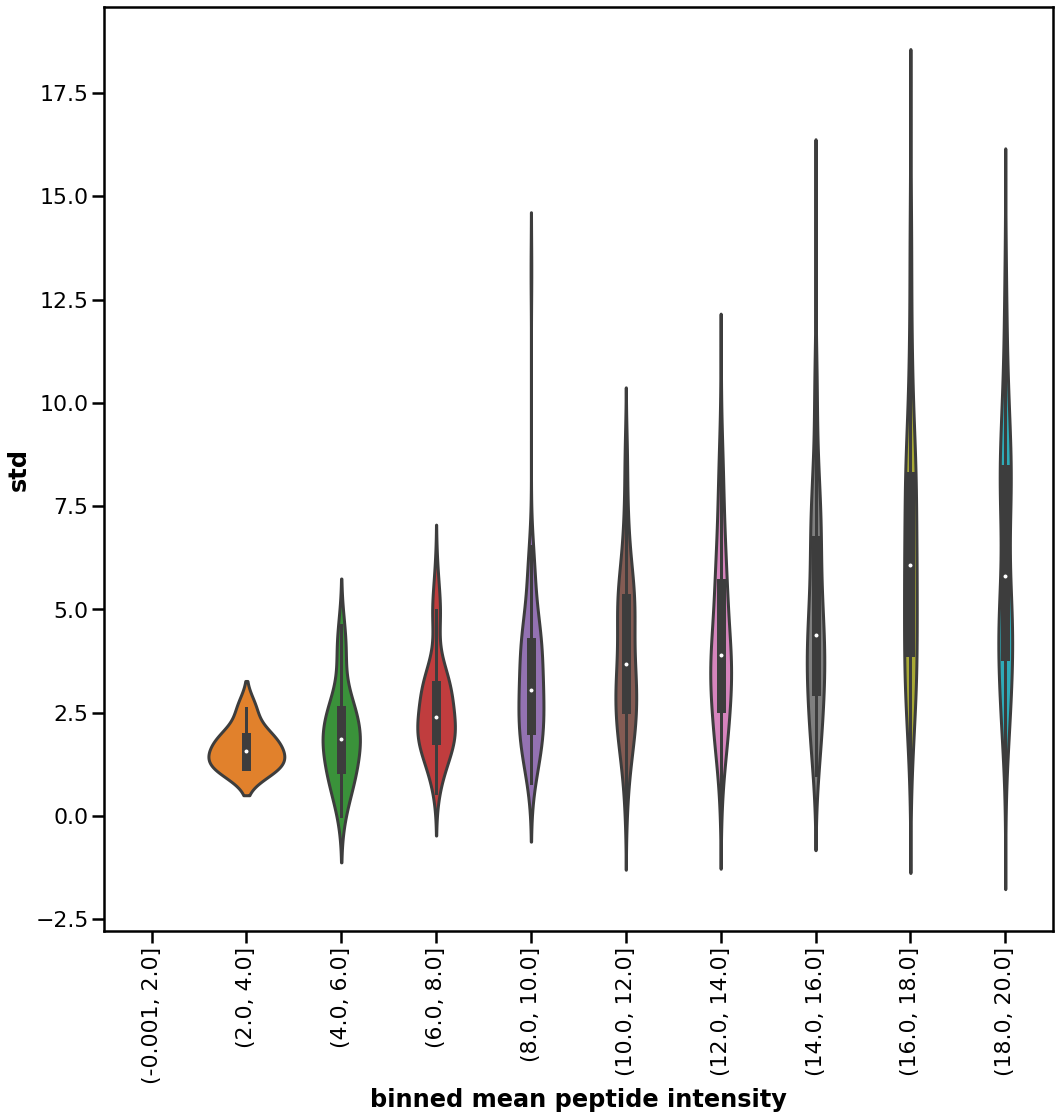

In [839]:
f, ax = plt.subplots(1, 1, figsize = (17,17))
sns.violinplot(x='binned_mu', y='std', data=df_stats_filtered, ax=ax)
#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel("std", fontweight = "bold")
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("binned mean peptide intensity", fontweight="bold")
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major',labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

# Quantile filtered

In [840]:
q = 10

df_stats["quantile_bin_mu"] = pd.qcut(df_stats["mu"], q=10, precision = 0)


In [841]:
bin_median_function = lambda x: round((x.left + x.right)/2, 2)

In [842]:
df_stats["quantile_bin_mu_median_of_bin_range"] = df_stats["quantile_bin_mu"].apply(bin_median_function)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


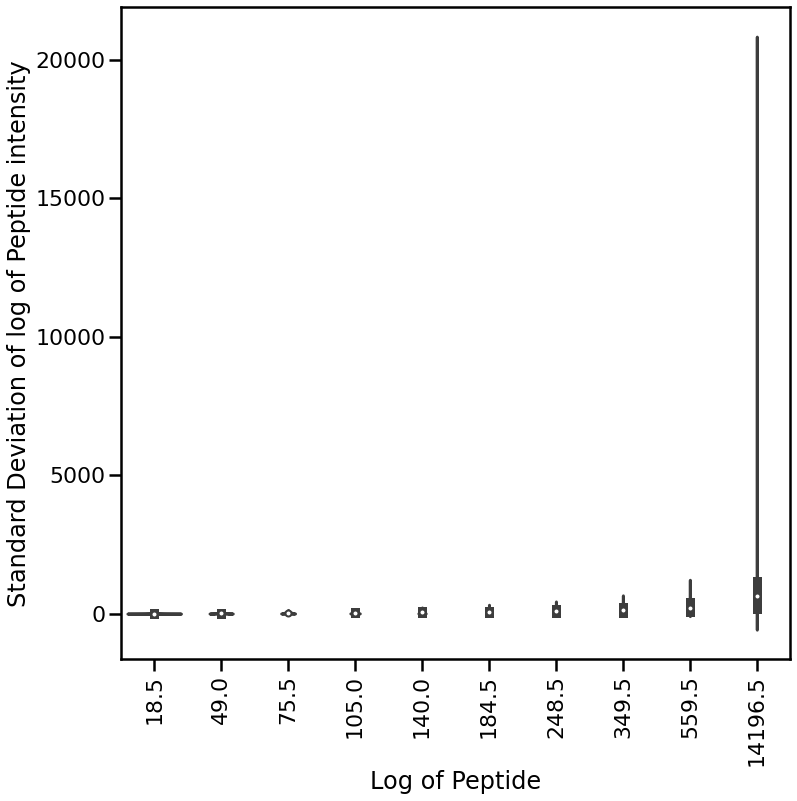

In [843]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel("Logarithm of Peptide", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")


#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)

#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel("Standard Deviation of log of Peptide intensity")
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide")
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major',labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


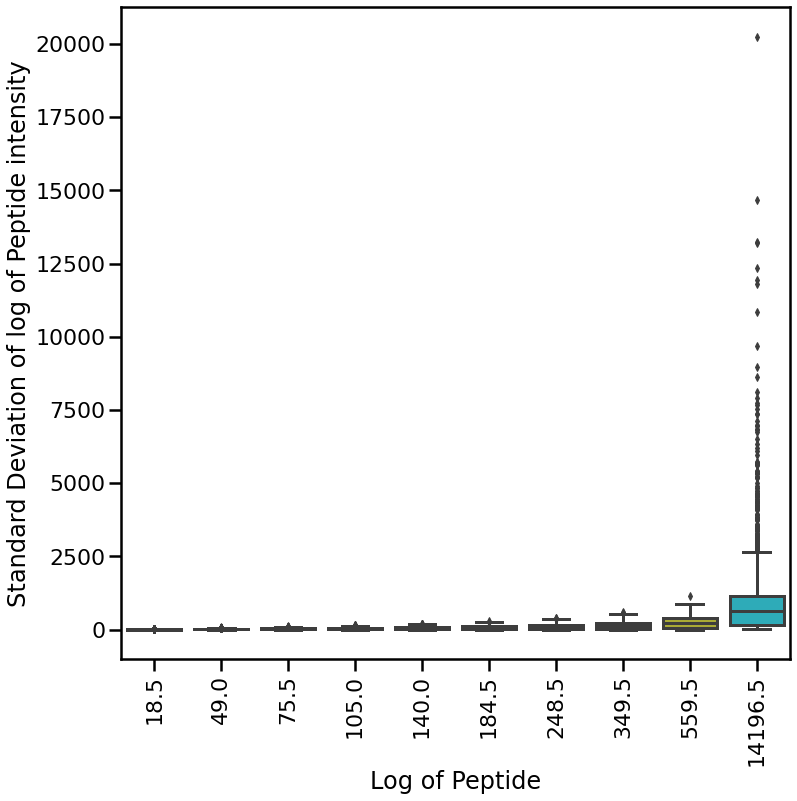

In [844]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats, ax=ax)

ax.set_ylabel("Standard Deviation of log of Peptide intensity")
ax.set_xlabel("Log of Peptide")
ax.tick_params(axis='x', which='major',labelrotation=90)


In [845]:
df_stats_filtered = df_stats_filtered.dropna()

In [846]:
#df_stats_filtered

In [847]:
df_stats_filtered

,mu,std,std/mu-ratio,binned_mu
peptide,,,,
AAADGGGPGGASVGTEEDGGGVGHR,15.680637,3.758486,0.239690,"(14.0, 16.0]"
AAAMANK,8.872156,2.744565,0.309346,"(8.0, 10.0]"
AAEEEDEADPK,15.039808,3.149296,0.209397,"(14.0, 16.0]"
AAELSGSHPDYNQAK,16.376297,5.863826,0.358068,"(16.0, 18.0]"
AAGDGDCGTTHSR,3.897550,1.163141,0.298429,"(2.0, 4.0]"
...,...,...,...,...
YTIHSQLEHLQSK,13.285041,4.236430,0.318887,"(12.0, 14.0]"
YTSQHEWIAVHQDK,11.023465,4.409377,0.399999,"(10.0, 12.0]"
YTTLIAK,10.457788,3.224054,0.308292,"(10.0, 12.0]"


In [848]:
df_stats_filtered["quantile_bin_mu"] = pd.qcut(df_stats_filtered["mu"], q=q, precision=0)

In [849]:
df_stats_filtered["quantile_bin_mu_median_of_bin_range"] = df_stats_filtered["quantile_bin_mu"].apply(bin_median_function)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


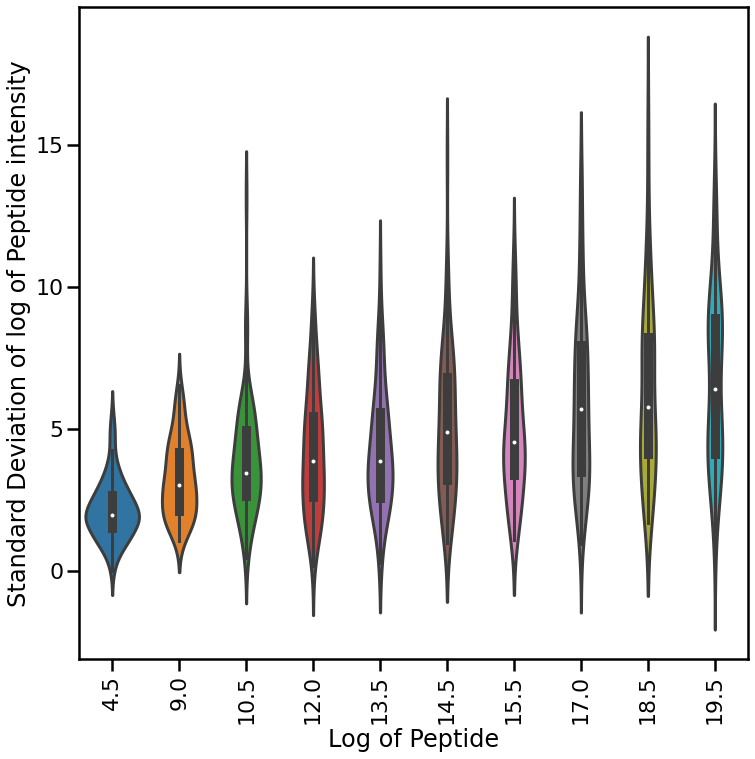

In [850]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
sns.violinplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax)
#ax.set_title("Mean vs Standard Deviation of Logarithm of Peptide Intensity", fontsize = 26, fontweight = "bold")
#ax.set_title("Mean vs Standard Deviation of Peptide Intensity, quantile binned", fontsize = 26, fontweight = "bold")

#ax.set_ylabel("Standard Deviation of Logarithm of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Logarithm of Peptide intensity", fontsize=26, fontweight="bold")

#ax.set_ylabel("Standard Deviation of Peptide intensity", fontsize=26, fontweight="bold")
#ax.set_xlabel(" Peptide intensity", fontsize=26, fontweight="bold")


#ax.tick_params(axis='x', which='major', labelsize=22, labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=22)
#ax.tick_params(axis='both', which='minor', labelsize=8)


#ax.set_title("mu vs std for log-transformed peptide values", fontsize = 18, fontweight = "bold")
#ax.set_ylabel("std", fontsize=18, fontweight="bold")
ax.set_ylabel("Standard Deviation of log of Peptide intensity")
#ax.set_xlabel("binned mean peptide intensity", fontsize=18, fontweight="bold")
ax.set_xlabel("Log of Peptide")
#ax.tick_params(axis='x', which='major', labelsize=14, labelrotation=90)
ax.tick_params(axis='x', which='major',labelrotation=90)
#ax.tick_params(axis='y', which='major', labelsize=14)

/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ptruong/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


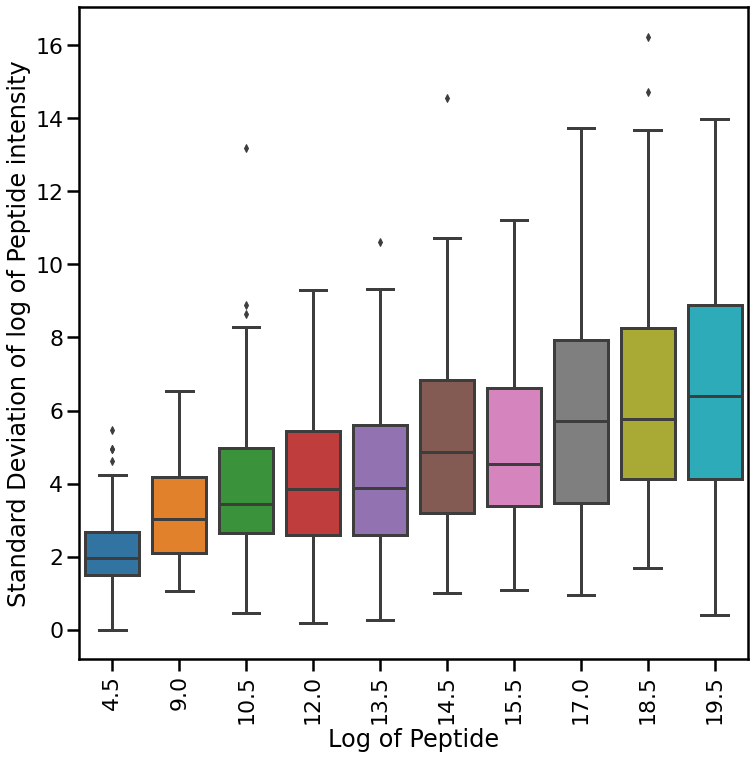

In [851]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
#sns.violinplot(x='quantile_bin_mu', y='std', data=df_stats, ax=ax)
sns.boxplot(x='quantile_bin_mu_median_of_bin_range', y='std', data=df_stats_filtered, ax=ax)

ax.set_ylabel("Standard Deviation of log of Peptide intensity")
ax.set_xlabel("Log of Peptide")
ax.tick_params(axis='x', which='major',labelrotation=90)


# KDE histograms of the bin-distributions

In [862]:
bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

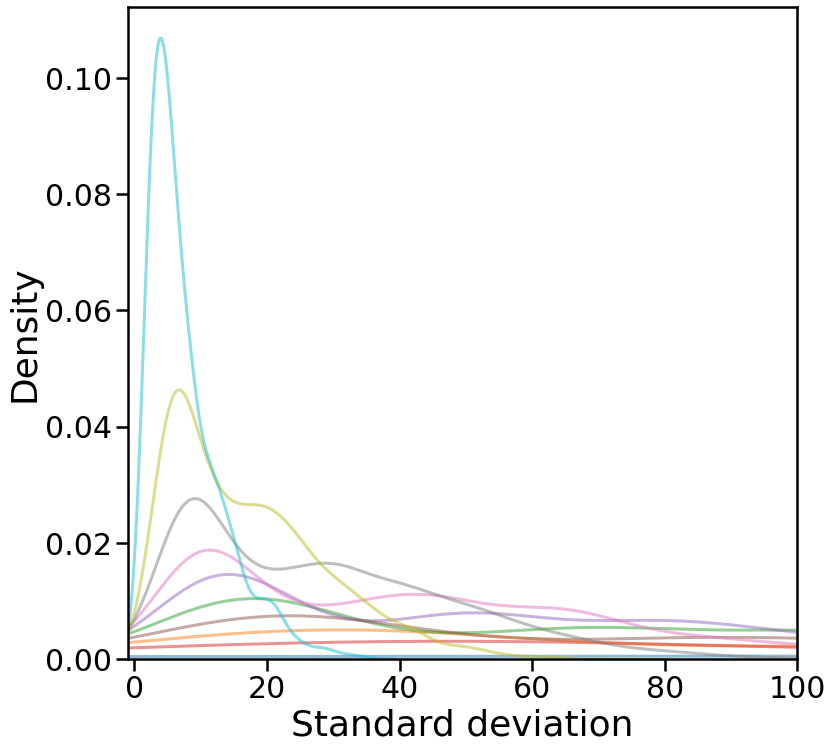

In [863]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel("Standard deviation", fontsize = 36)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 36)


for line in ax.get_lines():
    line.set_alpha(0.5)

In [864]:
bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()

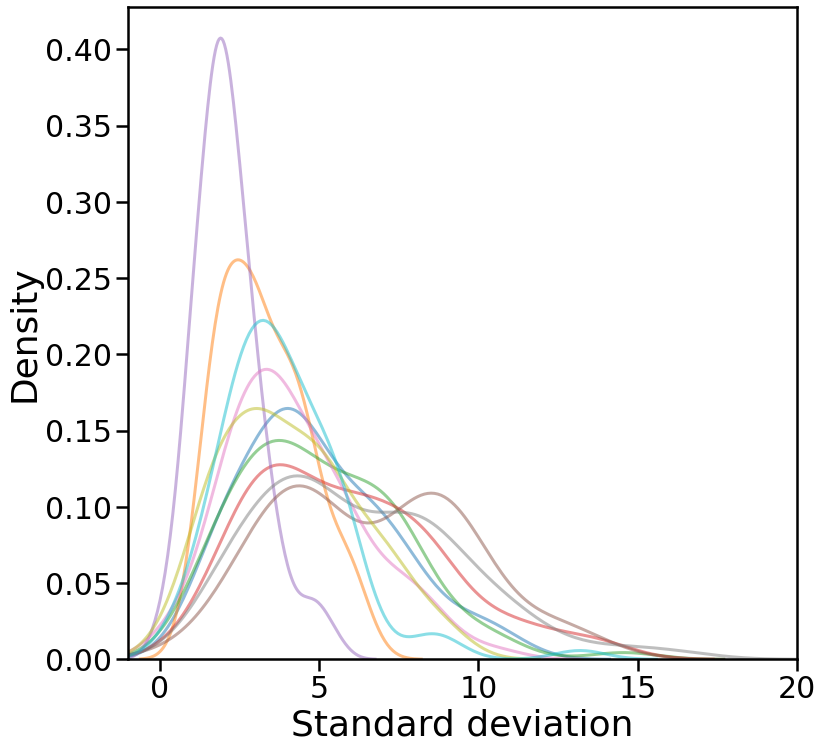

In [866]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

for i in bin_vals:
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == i].copy()
    sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)
ax.set_xlim(-1,5)

ax.set_xlabel("Standard deviation", fontsize = 36)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Density", fontsize = 36)



for line in ax.get_lines():
    line.set_alpha(0.5)

18.5


<AxesSubplot:xlabel='std', ylabel='Density'>

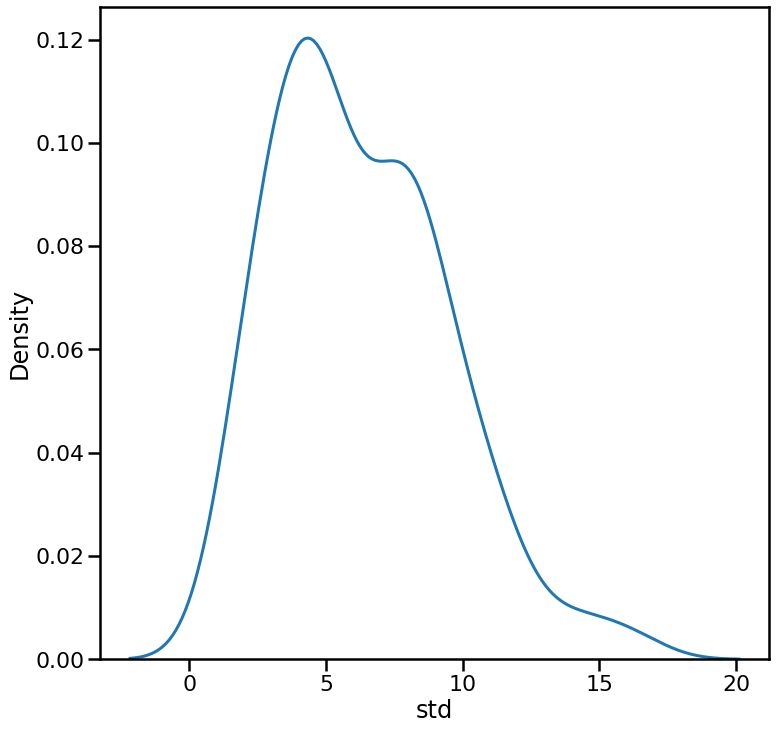

In [856]:
f, ax = plt.subplots(1, 1, figsize = (12,12))
i = 7
print(bin_vals[i])
df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
sns.kdeplot(data = df_stats_slice, x = "std", alpha = 0.5, ax = ax)


In [857]:
df_stats.quantile_bin_mu.values.unique()

[(707.0, 27686.0], (287.0, 412.0], (159.0, 210.0], (412.0, 707.0], (121.0, 159.0], (210.0, 287.0], (89.0, 121.0], (62.0, 89.0], (36.0, 62.0], (1.0, 36.0]]
Categories (10, interval[float64]): [(1.0, 36.0] < (36.0, 62.0] < (62.0, 89.0] < (89.0, 121.0] ... (210.0, 287.0] < (287.0, 412.0] < (412.0, 707.0] < (707.0, 27686.0]]

# Violin overlap

In [867]:
from matplotlib.pyplot import cm
n = len(bin_vals)
color = cm.rainbow(np.linspace(0, 1, n))

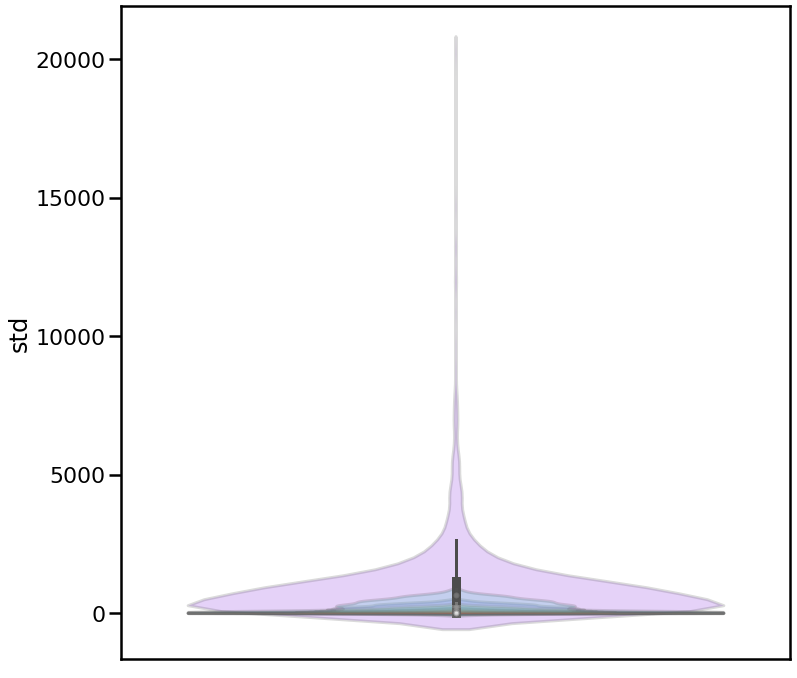

In [868]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats["quantile_bin_mu_median_of_bin_range"].values.unique()

for i in range(len(bin_vals)):
    df_stats_slice = df_stats[df_stats["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)

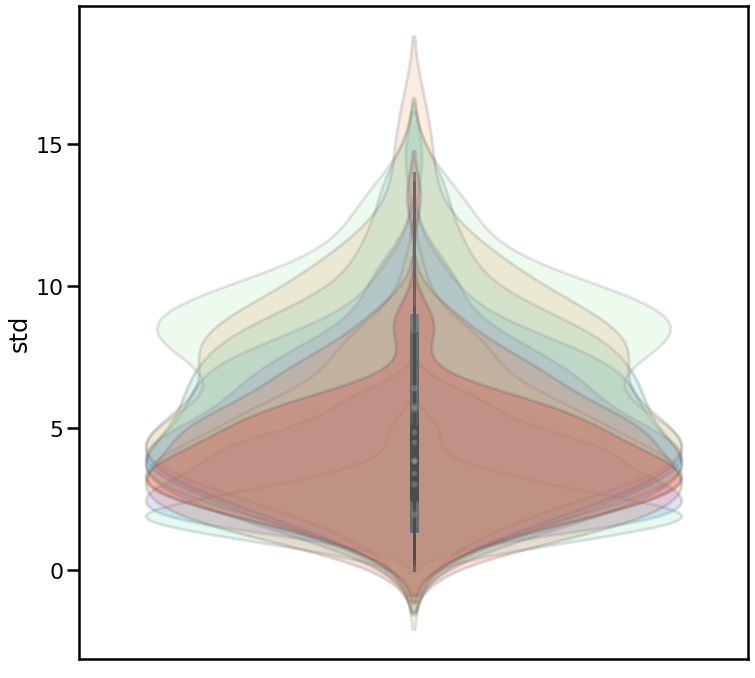

In [869]:
f, ax = plt.subplots(1, 1, figsize = (12,12))

bin_vals = df_stats_filtered["quantile_bin_mu_median_of_bin_range"].values.unique()
for i in range(len(bin_vals)):
    df_stats_slice = df_stats_filtered[df_stats_filtered["quantile_bin_mu_median_of_bin_range"] == bin_vals[i]].copy()
    df_stats_slice["quantile_bin_mu_median_of_bin_range"] = 0
    sns.violinplot(data = df_stats_slice, x  = "quantile_bin_mu_median_of_bin_range", y = "std",
                   ax = ax, color = color[i])
    plt.setp(ax.collections, alpha = 0.2)
ax.get_xaxis().set_visible(False)